In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("final.csv")

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df = df.drop(['Unnamed: 0', 'Year', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'DivAirportLandings', 'wpgt', 'tsun'], axis = 1)

In [ ]:
df = df.drop(['Tail_Number'], axis = 1)

In [ ]:
df

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

# Combine both columns to ensure consistent encoding
combined_data = pd.concat([df['OriginCityName'], df['DestCityName']], axis=0)

# Fit the encoder on the combined data
le.fit(combined_data)

# Transform both columns with the same encoder
df['OriginCityEncoded'] = le.transform(df['OriginCityName'])
df['DestCityEncoded'] = le.transform(df['DestCityName'])

print(df)

In [ ]:
df = df.drop(['OriginCityName', 'DestCityName'], axis = 1)

In [ ]:
df = df.drop(['index'], axis = 1)
df.columns

In [ ]:
df['CancellationCode_encoded'].value_counts()

In [ ]:
grouped = df.groupby(['FlightDate', 'OriginCityEncoded'])

# Fill NaN in Col1 with the mean of matching groups
for col in ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']:
    df[col] = grouped[col].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df

In [ ]:
df.isna().sum()

In [ ]:
df = df.drop(['snow'], axis=1)
df = df.dropna()
df

In [ ]:
df.isna().sum()

In [ ]:
df[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']] = df[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']].fillna(0)

In [152]:
y = df[['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]

In [154]:
x = df.drop(['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

In [132]:
x

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Flights,Distance,OriginCityEncoded,DestCityEncoded
0,2024-01-15,20409,616,14771,91,12478,22,1556,10,314,1,2586,297,235
1,2024-01-28,19805,341,11298,74,14492,36,2059,37,158,1,1061,81,276
2,2024-01-02,19393,3257,10821,35,14107,81,605,930,325,1,1999,24,262
3,2024-01-07,20304,3848,13487,63,13232,41,910,1100,110,1,349,217,64
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1413,98,1,441,348,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546943,2022-12-20,20363,5136,10397,34,14814,72,2159,2255,116,1,551,19,314
546944,2022-12-07,20416,144,13796,91,12889,85,545,711,86,1,407,244,188
546945,2022-12-10,19393,3183,10693,54,11259,74,1325,1530,125,1,623,232,80
546946,2022-12-21,19393,1364,12402,2,12173,2,620,715,55,1,216,148,151


In [92]:
y

,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,...,LateAircraftDelay,CancellationCode_encoded,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,1610.0,14.0,9.0,0.0,0,299.0,275.0,NaN,NaN,NaN,...,NaN,0,10.6,7.2,15.0,0.0,NaN,54.0,9.0,1020.4
1,2106.0,7.0,36.0,0.0,0,150.0,128.0,NaN,NaN,NaN,...,NaN,0,7.8,1.1,16.7,0.0,0.0,282.0,10.1,1028.9
2,604.0,0.0,843.0,0.0,0,279.0,261.0,NaN,NaN,NaN,...,NaN,0,5.5,2.8,7.8,0.0,0.0,310.0,15.4,1019.9
3,904.0,0.0,1054.0,0.0,0,110.0,68.0,NaN,NaN,NaN,...,NaN,0,-4.3,-5.0,-1.7,0.0,0.0,317.0,10.2,1015.0
4,1422.0,107.0,1550.0,97.0,0,88.0,69.0,97.0,0.0,0.0,...,0.0,0,4.9,2.8,6.7,0.0,0.0,33.0,6.8,1019.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546943,2156.0,0.0,2239.0,0.0,0,103.0,89.0,NaN,NaN,NaN,...,NaN,0,0.9,-7.2,12.8,0.3,0.0,26.0,7.3,1020.1
546944,539.0,0.0,702.0,0.0,0,83.0,62.0,NaN,NaN,NaN,...,NaN,0,12.1,10.6,13.9,0.3,0.0,223.0,8.7,1021.9
546945,1329.0,4.0,1540.0,10.0,0,131.0,109.0,NaN,NaN,NaN,...,NaN,0,5.7,4.4,7.2,5.8,0.0,1.0,2.2,1018.4
546946,616.0,0.0,709.0,0.0,0,53.0,40.0,NaN,NaN,NaN,...,NaN,0,-16.4,-25.6,10.6,6.4,127.0,35.0,20.2,1029.2


In [128]:
y.columns

Index(['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted',
       'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir',
       'wspd', 'pres'],
      dtype='object')

In [104]:
y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']] = y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']].fillna(0)

C:\Users\kopal\AppData\Local\Temp\ipykernel_19136\3035881227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']] = y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']].fillna(0)


In [106]:
y

,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,...,LateAircraftDelay,CancellationCode_encoded,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,1610.0,14.0,9.0,0.0,0,299.0,275.0,0.0,0.0,0.0,...,0.0,0,10.6,7.2,15.0,0.0,NaN,54.0,9.0,1020.4
1,2106.0,7.0,36.0,0.0,0,150.0,128.0,0.0,0.0,0.0,...,0.0,0,7.8,1.1,16.7,0.0,0.0,282.0,10.1,1028.9
2,604.0,0.0,843.0,0.0,0,279.0,261.0,0.0,0.0,0.0,...,0.0,0,5.5,2.8,7.8,0.0,0.0,310.0,15.4,1019.9
3,904.0,0.0,1054.0,0.0,0,110.0,68.0,0.0,0.0,0.0,...,0.0,0,-4.3,-5.0,-1.7,0.0,0.0,317.0,10.2,1015.0
4,1422.0,107.0,1550.0,97.0,0,88.0,69.0,97.0,0.0,0.0,...,0.0,0,4.9,2.8,6.7,0.0,0.0,33.0,6.8,1019.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546943,2156.0,0.0,2239.0,0.0,0,103.0,89.0,0.0,0.0,0.0,...,0.0,0,0.9,-7.2,12.8,0.3,0.0,26.0,7.3,1020.1
546944,539.0,0.0,702.0,0.0,0,83.0,62.0,0.0,0.0,0.0,...,0.0,0,12.1,10.6,13.9,0.3,0.0,223.0,8.7,1021.9
546945,1329.0,4.0,1540.0,10.0,0,131.0,109.0,0.0,0.0,0.0,...,0.0,0,5.7,4.4,7.2,5.8,0.0,1.0,2.2,1018.4
546946,616.0,0.0,709.0,0.0,0,53.0,40.0,0.0,0.0,0.0,...,0.0,0,-16.4,-25.6,10.6,6.4,127.0,35.0,20.2,1029.2


In [142]:
df['DateObjects'] = pd.to_datetime(df['FlightDate'])

In [144]:
df

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,tavg,tmin,tmax,prcp,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded,DateObjects
0,2024-01-15,20409,616,14771,91,12478,22,1556,1610.0,14.0,...,10.6,7.2,15.0,0.0,54.0,9.0,1020.4,297,235,2024-01-15
1,2024-01-28,19805,341,11298,74,14492,36,2059,2106.0,7.0,...,7.8,1.1,16.7,0.0,282.0,10.1,1028.9,81,276,2024-01-28
2,2024-01-02,19393,3257,10821,35,14107,81,605,604.0,0.0,...,5.5,2.8,7.8,0.0,310.0,15.4,1019.9,24,262,2024-01-02
3,2024-01-07,20304,3848,13487,63,13232,41,910,904.0,0.0,...,-4.3,-5.0,-1.7,0.0,317.0,10.2,1015.0,217,64,2024-01-07
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1422.0,107.0,...,4.9,2.8,6.7,0.0,33.0,6.8,1019.2,348,50,2024-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546943,2022-12-20,20363,5136,10397,34,14814,72,2159,2156.0,0.0,...,0.9,-7.2,12.8,0.3,26.0,7.3,1020.1,19,314,2022-12-20
546944,2022-12-07,20416,144,13796,91,12889,85,545,539.0,0.0,...,12.1,10.6,13.9,0.3,223.0,8.7,1021.9,244,188,2022-12-07
546945,2022-12-10,19393,3183,10693,54,11259,74,1325,1329.0,4.0,...,5.7,4.4,7.2,5.8,1.0,2.2,1018.4,232,80,2022-12-10
546946,2022-12-21,19393,1364,12402,2,12173,2,620,616.0,0.0,...,-16.4,-25.6,10.6,6.4,35.0,20.2,1029.2,148,151,2022-12-21


In [146]:
df = df.sort_values(by='DateObjects')

In [148]:
df

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,tavg,tmin,tmax,prcp,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded,DateObjects
36179,2022-01-01,19977,1869,15304,33,11292,82,1601,1648.0,47.0,...,4.3,-0.5,12.2,0.0,356.0,6.1,1031.4,333,87,2022-01-01
36028,2022-01-01,19790,1575,13204,33,10397,34,1200,1154.0,0.0,...,23.1,19.4,26.1,0.5,128.0,15.5,1017.3,250,19,2022-01-01
44638,2022-01-01,19393,2087,10693,54,14986,33,2040,2107.0,27.0,...,12.7,7.8,17.2,0.0,345.0,15.5,1024.9,232,307,2022-01-01
41818,2022-01-01,19790,2563,10423,74,13487,63,640,628.0,0.0,...,18.1,14.4,22.8,0.0,332.0,11.2,1015.2,22,217,2022-01-01
36077,2022-01-01,19393,995,13796,91,12954,91,1305,1258.0,0.0,...,13.6,7.8,20.6,0.0,339.0,4.7,1016.3,244,198,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364638,2024-08-31,19977,1421,11042,44,13930,41,600,557.0,0.0,...,21.8,15.8,28.4,0.0,110.0,14.0,1015.8,68,64,2024-08-31
370131,2024-08-31,20304,3400,14747,93,10666,93,1252,1247.0,0.0,...,25.1,21.7,31.1,0.5,168.0,11.2,1014.7,312,30,2024-08-31
358435,2024-08-31,20398,3924,11298,74,11067,41,1219,1213.0,0.0,...,25.1,22.2,28.9,1.8,176.0,14.0,1009.7,81,56,2024-08-31
372420,2024-08-31,19805,1101,13930,41,15304,33,1309,1304.0,0.0,...,38.7,33.3,44.4,0.0,277.0,12.2,1009.3,64,333,2024-08-31


In [150]:
df = df.drop(['FlightDate'], axis = 1)

In [174]:
df['Year'] = df['DateObjects'].dt.year
df['Month'] = df['DateObjects'].dt.month
df['Day'] = df['DateObjects'].dt.day
df['Quarter'] = df['DateObjects'].dt.quarter
df['Week'] = df['DateObjects'].dt.isocalendar().week

In [156]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [176]:
cut_off_date = pd.to_datetime('2024-01-01')

# Split the DataFrame into training and testing sets
train_df = df[df['DateObjects'] < cut_off_date]  # Training data
test_df = df[df['DateObjects'] >= cut_off_date]

In [ ]:
#'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'

In [314]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

In [316]:
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

In [318]:
y_test

,tavg,tmin,tmax,prcp,wdir,wspd,pres
10990,5.9,1.1,12.8,0.0,37.0,7.6,1026.5
2149,24.6,23.3,27.2,0.0,121.0,19.1,1020.8
10720,1.4,0.0,3.9,11.4,157.0,7.9,1032.4
15376,-2.7,-7.8,3.3,0.0,32.0,2.9,1007.2
2049,-1.6,-6.2,5.3,0.0,98.0,8.9,1019.4
...,...,...,...,...,...,...,...
364638,21.8,15.8,28.4,0.0,110.0,14.0,1015.8
370131,25.1,21.7,31.1,0.5,168.0,11.2,1014.7
358435,25.1,22.2,28.9,1.8,176.0,14.0,1009.7
372420,38.7,33.3,44.4,0.0,277.0,12.2,1009.3


In [320]:
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"R² Score: {r2_scores}")

R² Score: 0.0031372213376923597


In [321]:
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
y_pred

,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,15.569755,10.716797,20.658943,2.404552,197.108560,13.126212,1014.857330
1,14.872704,10.041733,19.942591,2.457854,197.552176,13.087388,1015.069507
2,14.579478,9.743010,19.646633,2.406926,197.203202,13.130980,1015.161624
3,13.971962,9.159841,19.019357,2.407632,198.510167,13.121940,1015.384734
4,15.211827,10.377490,20.282025,2.465057,197.135248,13.093006,1014.939067
...,...,...,...,...,...,...,...
138977,17.976187,13.497088,22.805913,2.582295,187.129012,11.395075,1015.055212
138978,18.446913,13.953792,23.295625,2.601557,185.944640,11.371342,1014.900013
138979,18.175910,13.686972,23.009924,2.648465,186.061328,11.357348,1014.968246
138980,18.544982,14.070649,23.370445,2.614477,186.561835,11.408365,1014.814010


In [322]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

In [325]:
x_test

,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Flights,...,Day,Quarter,Week,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,20409,954,14843,3,11697,33,610,803,173,1,...,1,1,1,15.569755,10.716797,20.658943,2.404552,197.108560,13.126212,1014.857330
1,19393,1487,12892,91,12889,85,1735,1845,70,1,...,1,1,1,14.872704,10.041733,19.942591,2.457854,197.552176,13.087388,1015.069507
2,20436,1543,14635,33,11042,44,1617,1913,176,1,...,1,1,1,14.579478,9.743010,19.646633,2.406926,197.203202,13.130980,1015.161624
3,19393,2893,12889,85,14747,93,925,1210,165,1,...,1,1,1,13.971962,9.159841,19.019357,2.407632,198.510167,13.121940,1015.384734
4,19393,2906,12889,85,14107,81,2025,2235,70,1,...,1,1,1,15.211827,10.377490,20.282025,2.465057,197.135248,13.093006,1014.939067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138977,19977,1421,11042,44,13930,41,600,629,89,1,...,31,3,35,17.976187,13.497088,22.805913,2.582295,187.129012,11.395075,1015.055212
138978,20304,3400,14747,93,10666,93,1252,1347,55,1,...,31,3,35,18.446913,13.953792,23.295625,2.601557,185.944640,11.371342,1014.900013
138979,20398,3924,11298,74,11067,41,1219,1426,127,1,...,31,3,35,18.175910,13.686972,23.009924,2.648465,186.061328,11.357348,1014.968246
138980,19805,1101,13930,41,15304,33,1309,1643,154,1,...,31,3,35,18.544982,14.070649,23.370445,2.614477,186.561835,11.408365,1014.814010


In [327]:
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"R² Score: {r2_scores}")

R² Score: 0.7254030023105993


In [328]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
y_pred

,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode_encoded
0,0.001534,170.135735,140.922752,5.228592,0.431277,3.614511,0.047425,3.514233,0.0
1,0.000463,64.597337,44.343169,3.811987,0.454498,1.654436,0.017428,8.112781,0.0
2,0.002265,171.106175,139.604732,6.764627,1.199501,4.562335,0.045554,8.584947,0.0
3,0.002069,153.807404,129.391289,3.143392,-0.062145,0.949320,-0.006359,2.139950,0.0
4,0.000750,65.082535,45.641611,4.134228,0.633687,1.699427,0.013031,9.199528,0.0
...,...,...,...,...,...,...,...,...,...
138977,0.000923,83.487785,57.098641,3.542286,0.594727,1.716161,0.022535,2.280450,0.0
138978,0.001329,52.372668,25.696881,3.405329,1.170056,1.627522,0.012249,5.690048,0.0
138979,0.002777,122.097476,92.592232,5.074147,1.286479,2.942180,0.024762,5.093268,0.0
138980,0.001821,150.809697,127.839652,4.292310,0.442800,3.142132,0.035516,6.709459,0.0


In [330]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

In [331]:
x_train

,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Flights,...,pres,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode_encoded
36179,19977,1869,15304,33,11292,82,1601,1810,249,1,...,1031.4,0,265.0,204.0,5.0,0.0,16.0,0.0,42.0,0
36028,19790,1575,13204,33,10397,34,1200,1332,92,1,...,1017.3,0,90.0,63.0,0.0,0.0,0.0,0.0,0.0,0
44638,19393,2087,10693,54,14986,33,2040,2330,110,1,...,1024.9,0,100.0,88.0,0.0,0.0,0.0,0.0,17.0,0
41818,19790,2563,10423,74,13487,63,640,917,157,1,...,1015.2,0,139.0,116.0,0.0,0.0,0.0,0.0,0.0,0
36077,19393,995,13796,91,12954,91,1305,1430,85,1,...,1016.3,0,74.0,61.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527244,20397,5511,11057,36,10693,54,1340,1419,99,1,...,1012.4,0,94.0,65.0,0.0,0.0,0.0,0.0,0.0,0
514323,19790,2456,10397,34,11193,52,1425,1547,82,1,...,1016.3,0,80.0,60.0,0.0,20.0,0.0,0.0,0.0,0
517378,20304,3305,14057,92,14831,91,1600,1753,113,1,...,1020.7,0,105.0,89.0,0.0,0.0,0.0,0.0,71.0,0
519251,19393,3159,12889,85,14679,91,615,730,75,1,...,1016.4,0,66.0,45.0,0.0,0.0,0.0,0.0,0.0,0


In [332]:
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"R² Score: {r2_scores}")

R² Score: 0.742630856999267


In [333]:
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
y_pred

,DepTime,DepDelayMinutes,ArrTime
0,612.183674,11.123411,839.375195
1,1741.422109,16.651785,1774.269641
2,1623.700643,21.306205,1816.650939
3,949.572381,8.551280,1225.131323
4,2039.019874,18.380299,2115.659998
...,...,...,...
138977,599.728345,8.631087,708.858951
138978,1248.698875,11.843614,1347.095254
138979,1216.364129,14.532282,1406.335114
138980,1321.734645,15.444573,1581.630977


In [336]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

In [338]:
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"R² Score: {r2_scores}")

R² Score: 0.006539838303211032


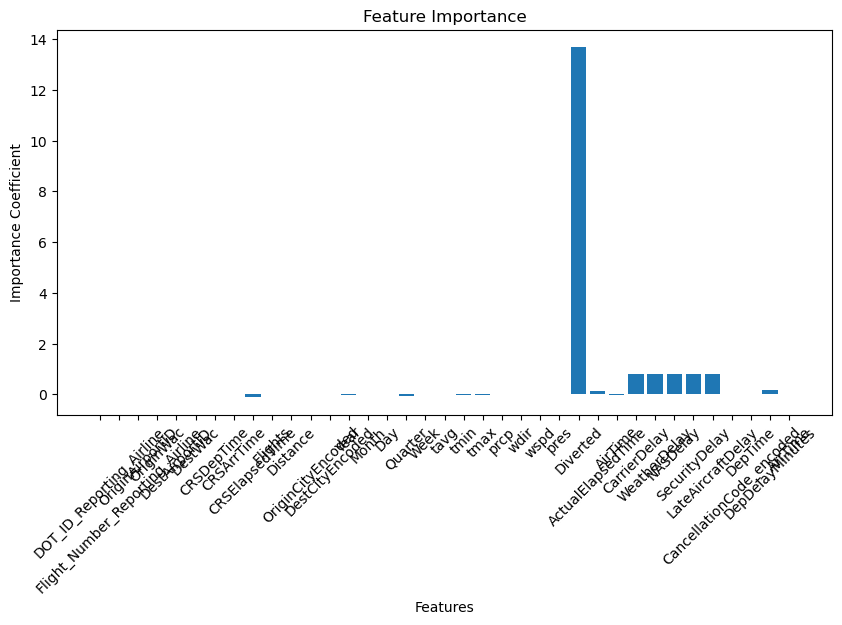

In [341]:
# Plot feature importance
importance = model.coef_[0]
features = x_train.columns

plt.figure(figsize=(10, 5))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Coefficient')
plt.xticks(rotation=45)
plt.show()

R² Score: 0.7255117140065
R² Score: 0.7426976086831727
R² Score: 0.007737507424836476


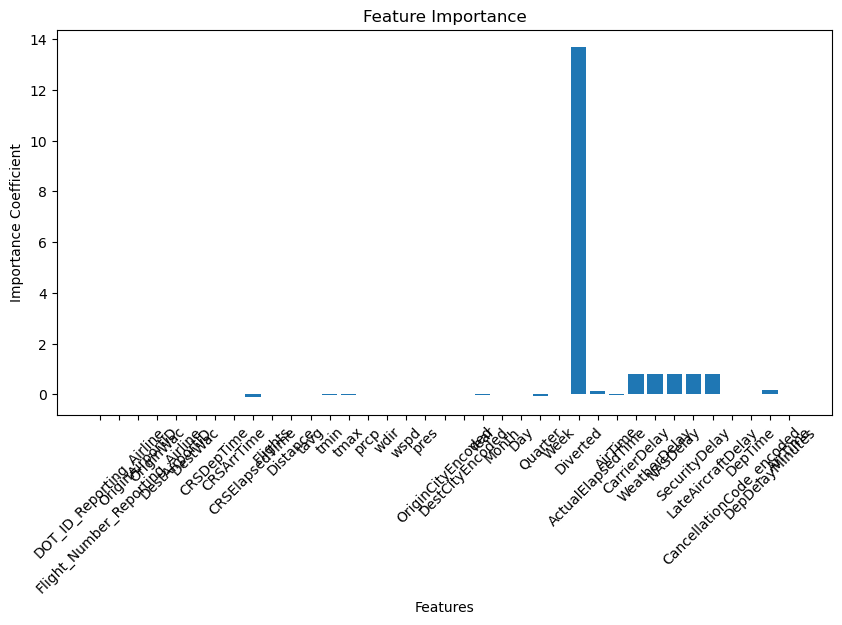

In [404]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"R² Score: {r2_scores}")
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"R² Score: {r2_scores}")

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"R² Score: {r2_scores}")
# Plot feature importance
importance = model.coef_[0]
features = x_train.columns

plt.figure(figsize=(10, 5))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Coefficient')
plt.xticks(rotation=45)
plt.show()

In [405]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

In [406]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1691.1141909972346
R^2 Score: 0.20270675177077432


In [407]:
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

In [408]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 433.21712020373513
R^2 Score: 0.3065331145316757


In [409]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

In [410]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 61514.78663830223
R^2 Score: 0.4566849609024855


In [411]:
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

C:\Users\kopal\anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 3701.62361879452
R^2 Score: -0.022938258021584668


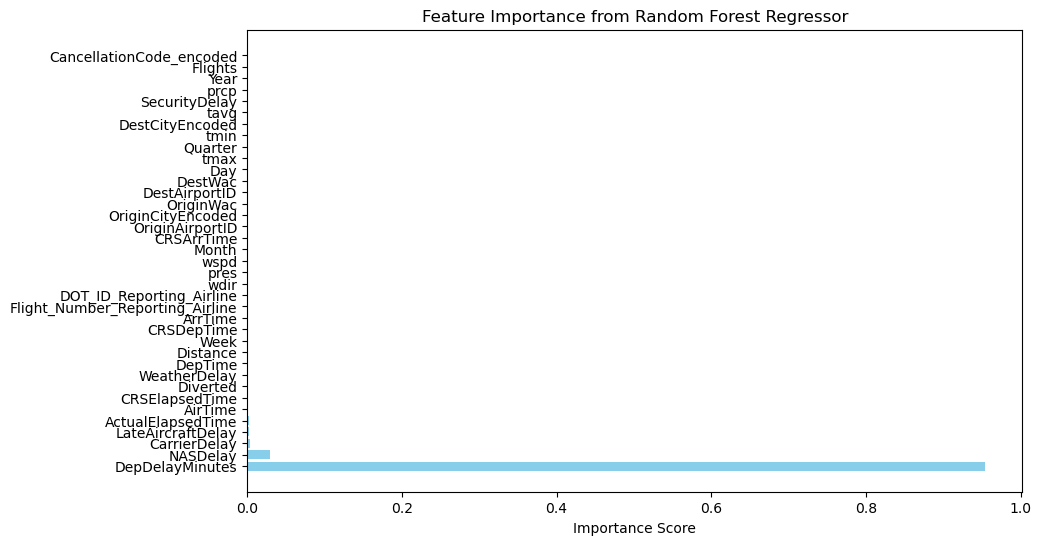

In [412]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2) 

importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Regressor')
plt.show()


Mean Squared Error: 448.34164170660046
R^2 Score: 0.2864637977151847
Mean Squared Error: 63774.19714139368
R^2 Score: 0.4384401151494542


C:\Users\kopal\anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 3846.6008764242856
R^2 Score: -0.06300251053487371


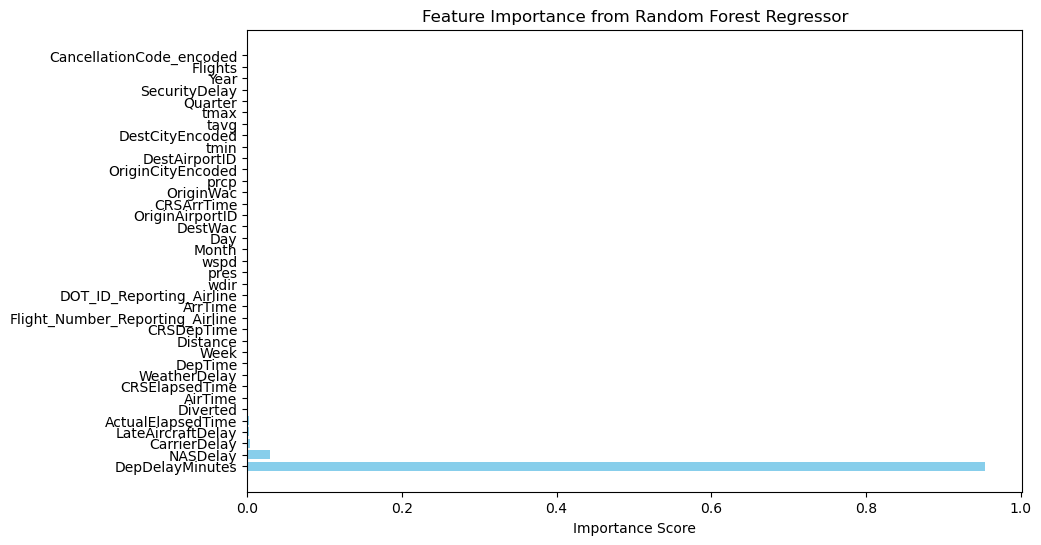

In [413]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2) 

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2) 

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2) 

importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Regressor')
plt.show()

In [503]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 3401.787682321223
R^2 Score: -0.5710860632280894


In [504]:
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 918.0666832955186
R^2 Score: -0.43738640094569764


In [505]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 85335.20248425455
R^2 Score: 0.01582883115815829


Mean Squared Error: 7700.253047157185
R^2 Score: -1.1279536359100648


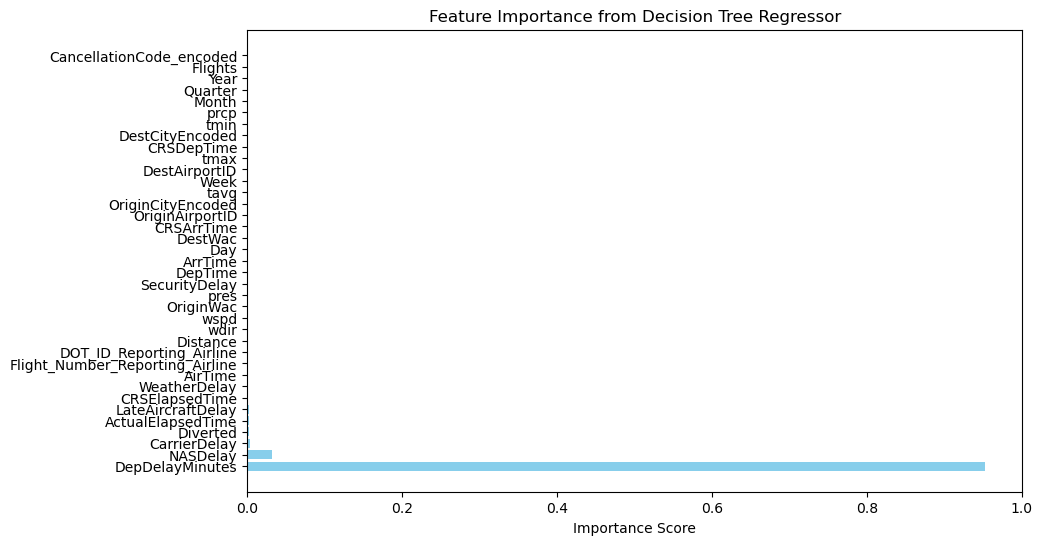

In [506]:
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2) 
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree Regressor')
plt.show()


Mean Squared Error: 944.5493317280096
R^2 Score: -0.467733972362673
Mean Squared Error: 85865.9353081694
R^2 Score: -0.0013886546895397849
Mean Squared Error: 7828.932494855449
R^2 Score: -1.1635140125521688


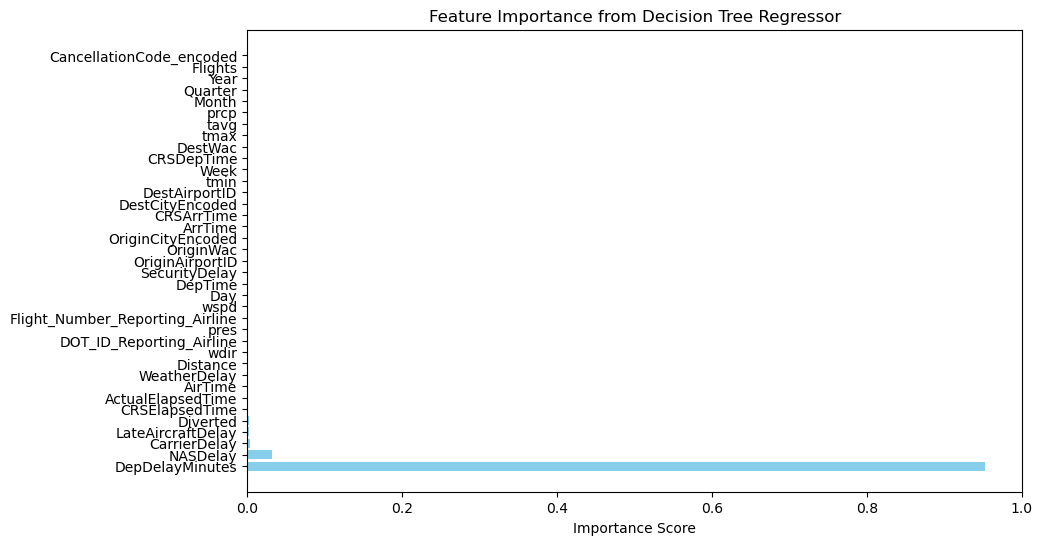

In [543]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2) 
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2) 
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2) 
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree Regressor')
plt.show()



In [544]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1619.1850114914519
R^2 Score: 0.02458779951292619
Mean Squared Error: 420.95080606015216
R^2 Score: 0.3250143221469497


C:\Users\kopal\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 49097.11551149273
R^2 Score: 0.5073968441470148
Mean Squared Error: 3592.345110335831
R^2 Score: 0.007260697516291659


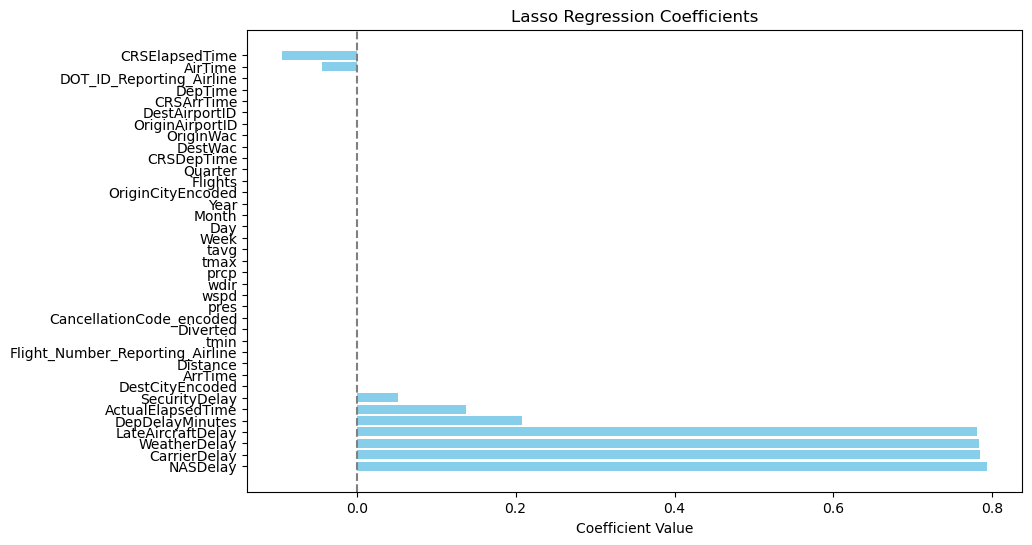

In [545]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
coefficients = lasso.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
plt.show()

C:\Users\kopal\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 420.8282518479778
R^2 Score: 0.32514542962537096
Mean Squared Error: 49082.94709302185
R^2 Score: 0.5077062569600224
Mean Squared Error: 3589.5997519898333
R^2 Score: 0.008019373268694174


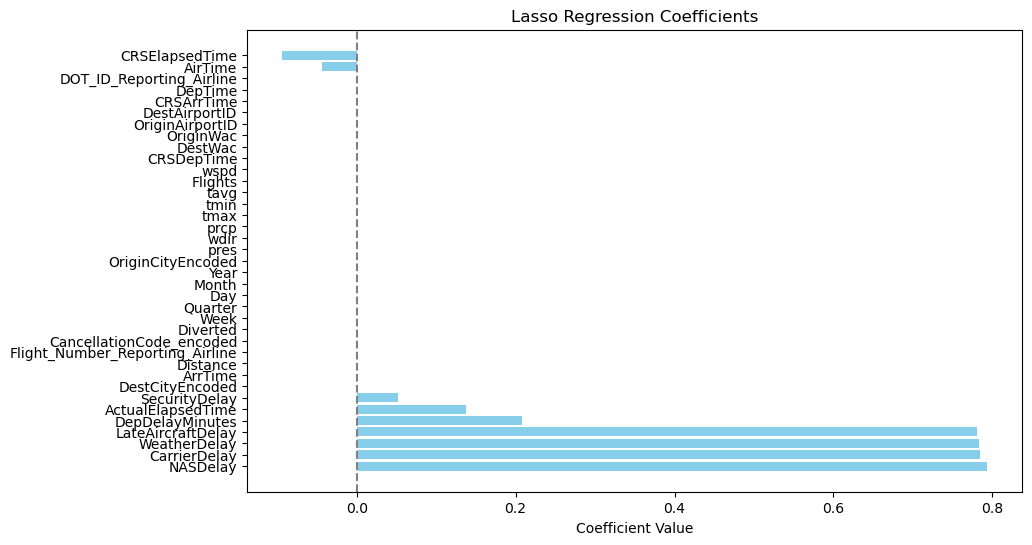

In [546]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

coefficients = lasso.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
plt.show()

In [572]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1614.5133026812048
R^2 Score: 0.05469422512161507
Mean Squared Error: 420.89221939750445
R^2 Score: 0.32514465939685677


Mean Squared Error: 49099.546499474185
R^2 Score: 0.50706264824256
Mean Squared Error: 3594.9535728014753
R^2 Score: 0.006539852739644747


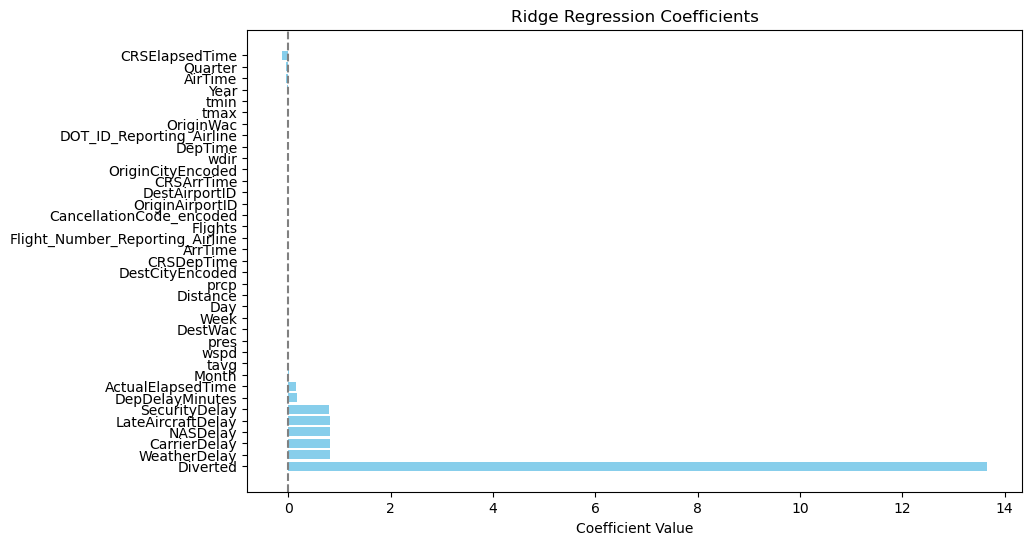

In [574]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
coefficients = ridge.coef_.flatten()

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
plt.show()


Mean Squared Error: 420.7255897685903
R^2 Score: 0.3253343779287692
Mean Squared Error: 49086.811938843144
R^2 Score: 0.5075428798064271
Mean Squared Error: 3590.619657848983
R^2 Score: 0.007737523780375732


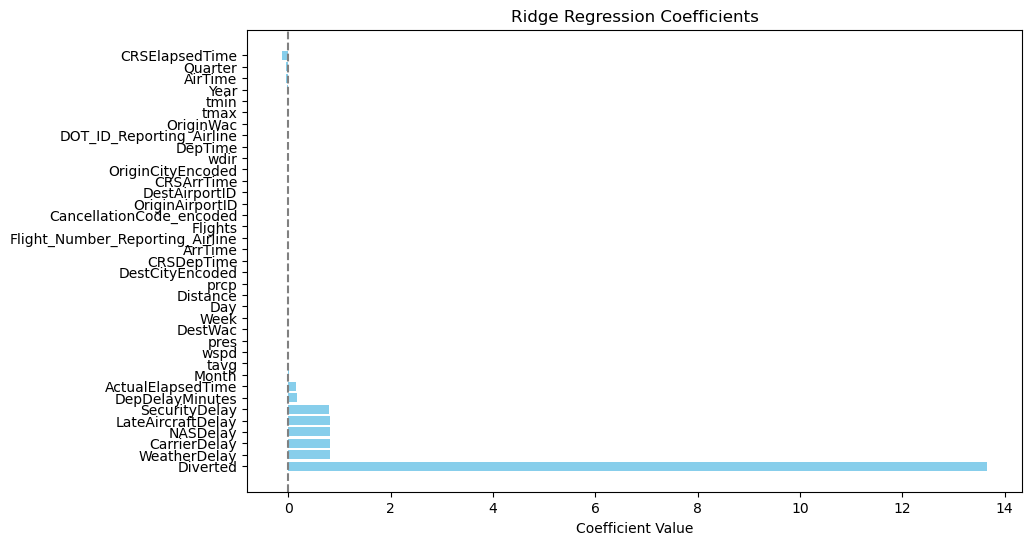

In [576]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
coefficients = ridge.coef_.flatten()

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
plt.show()



In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

if svr.kernel == 'linear':
    coefficients = svr.coef_.flatten()
    
    # Create a DataFrame for visualization
    coef_df = pd.DataFrame({
        'Feature': x_train.columns,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)
    
    # Plotting coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title('SVR Regression Coefficients (Linear Kernel)')
    plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
    plt.show()
else:
    print("Feature importances cannot be visualized for non-linear SVR models.")


In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

if svr.kernel == 'linear':
    coefficients = svr.coef_.flatten()
    
    # Create a DataFrame for visualization
    coef_df = pd.DataFrame({
        'Feature': x_train.columns,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)
    
    # Plotting coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title('SVR Regression Coefficients (Linear Kernel)')
    plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
    plt.show()
else:
    print("Feature importances cannot be visualized for non-linear SVR models.")


In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = gbr.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()


In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = gbr.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()

In [ ]:
!pip install lightgbm

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = gbr.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = lgb_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from LightGBM Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = lgb_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from LightGBM Regressor')
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = xg_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = xg_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Regressor')
plt.show()


In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = et_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Extra Trees Regressor')
plt.show()y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]


In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = et_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Extra Trees Regressor')
plt.show()

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

coefficients = elastic_net_regressor.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients from Elastic Net Regressor')
plt.axvline(0, color='black', lw=1)
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


coefficients = elastic_net_regressor.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients from Elastic Net Regressor')
plt.axvline(0, color='black', lw=1)
plt.show()

In [ ]:
!pip install catboost

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = cat_regressor.get_feature_importance()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from CatBoost Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = cat_regressor.get_feature_importance()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from CatBoost Regressor')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), 
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), 
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), 
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), 
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = ada_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from AdaBoost Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), 
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), 
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), 
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = ada_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from AdaBoost Regressor')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
model = ARIMA(y_train, order=(2, 1, 2))  # (p, d, q)
arima_model = model.fit()

# Forecast on the test set
forecast = arima_model.forecast(steps=len(y_test))

# Evaluate the model
mse = mean_squared_error(y_test, forecast)
print("Mean Squared Error:", mse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model = model.fit()

# Forecast on the test set
forecast = sarimax_model.forecast(steps=len(y_test))

# Evaluate the model
mse = mean_squared_error(y_test, forecast)
print("Mean Squared Error:", mse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()